# Proyecto ML

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

## Dataset analysis

In [172]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/MUCSI/VC
df = pd.read_csv("dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MUCSI/VC


In [173]:
df

,image,l_shldr,r_shldr,l_elbow,r_elbow,l_hip,r_hip,l_knee,r_knee,nose,class
0,1-2699.jpg,309.587544,56.611486,354.791081,77.005383,164.400914,200.038455,168.690068,194.767161,708,1
1,1-3388.jpg,301.044835,312.776039,201.271609,212.242923,87.143010,123.138501,137.667533,133.579734,471,1
2,1-4474.jpg,274.820075,304.362422,217.023476,238.621398,168.496302,161.720277,154.198847,155.921128,1417,1
3,1-5113.jpg,310.264417,91.051757,7.186025,120.497304,339.357312,199.578036,331.071994,190.423472,628,1
4,1-6214.jpg,323.623779,350.295133,288.786452,236.699226,100.982478,159.018747,72.900419,120.442075,498,1
...,...,...,...,...,...,...,...,...,...,...,...
95,4-615-3141.jpeg,319.587209,339.699767,10.606698,260.176068,175.498595,203.552540,177.035014,179.648497,615,4
96,4-700-3222.jpeg,316.568281,338.262024,281.609908,196.868658,169.853915,181.542250,160.757132,170.164769,700,4
97,4-847-5059.jpeg,31.328693,145.074333,127.234834,172.186779,166.759480,194.036243,186.831006,187.109025,847,4
98,5-345-2446.jpeg,0.000000,19.081335,86.112090,309.574774,167.110759,182.294731,165.531312,173.394158,345,5


In [174]:
df.describe()

,l_shldr,r_shldr,l_elbow,r_elbow,l_hip,r_hip,l_knee,r_knee,nose,class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,205.088585,156.117188,170.267533,196.911941,172.781110,184.035033,175.015631,181.594880,738.230000,2.430000
std,130.984607,113.267091,101.177378,69.047858,63.762180,60.317766,50.125542,48.206972,406.019078,1.165627
min,0.000000,0.900885,7.186025,28.072487,0.720772,1.449460,25.186571,18.103763,136.000000,1.000000
25%,47.605686,59.494599,92.035188,160.227743,137.408737,168.253686,151.638816,168.124714,434.750000,2.000000
50%,270.147778,150.024120,170.964669,181.585844,170.503961,194.378595,170.475826,183.220359,660.500000,2.000000
75%,322.650348,191.070818,245.258192,246.960741,194.599401,204.596625,207.871927,201.961238,880.250000,3.250000
max,358.990981,357.878904,356.291572,357.067590,354.999473,357.144605,341.719790,320.370995,1785.000000,5.000000


In [175]:
df['class'].value_counts()

2    37
1    24
4    22
3    14
5     3
Name: class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f222aa50d90>,
      dtype=object)

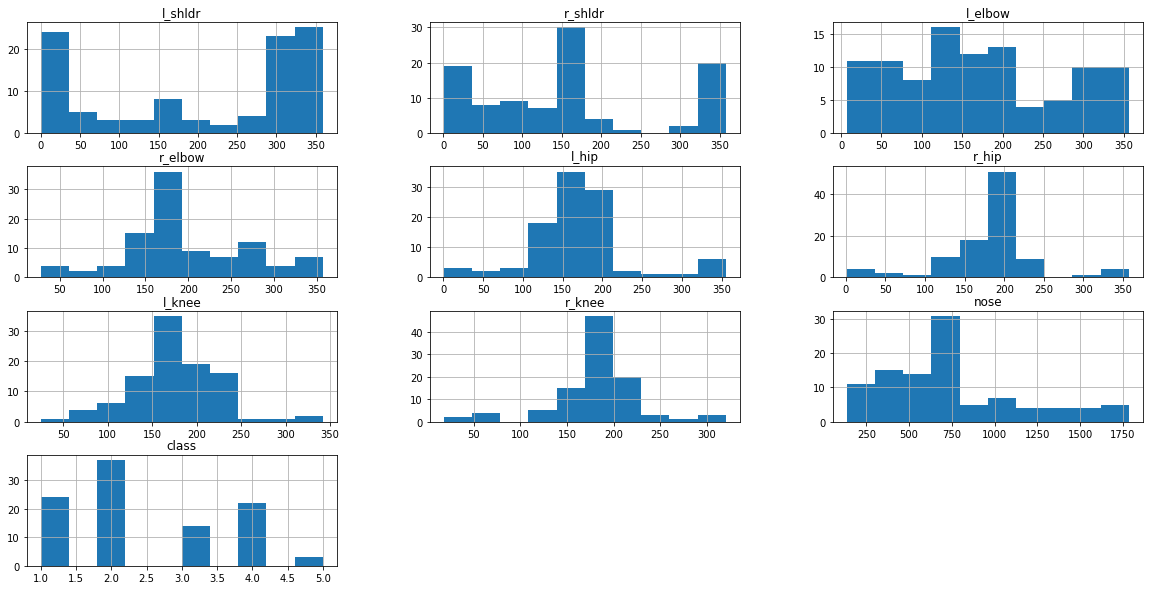

In [176]:
df.hist(figsize=(20,10))

## Preprocessing

In [177]:
df.drop(['image'], axis=1, inplace=True)
df.drop(df[df['class'] == 5].index, inplace = True)

In [178]:
X = df.drop(['class'], axis=1)
y = df['class']

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)

scaler = Normalizer().fit(df_scaled)
normalizedX = scaler.transform(df_scaled)

In [179]:
df_scaled = pd.DataFrame(df_scaled, columns = ["l_shdlr", "r_shdlr", "l_elbow", "r_elbow", "l_hip", "r_hip", "l_knee", "r_knee", "nose"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f222a58d790>,
      dtype=object)

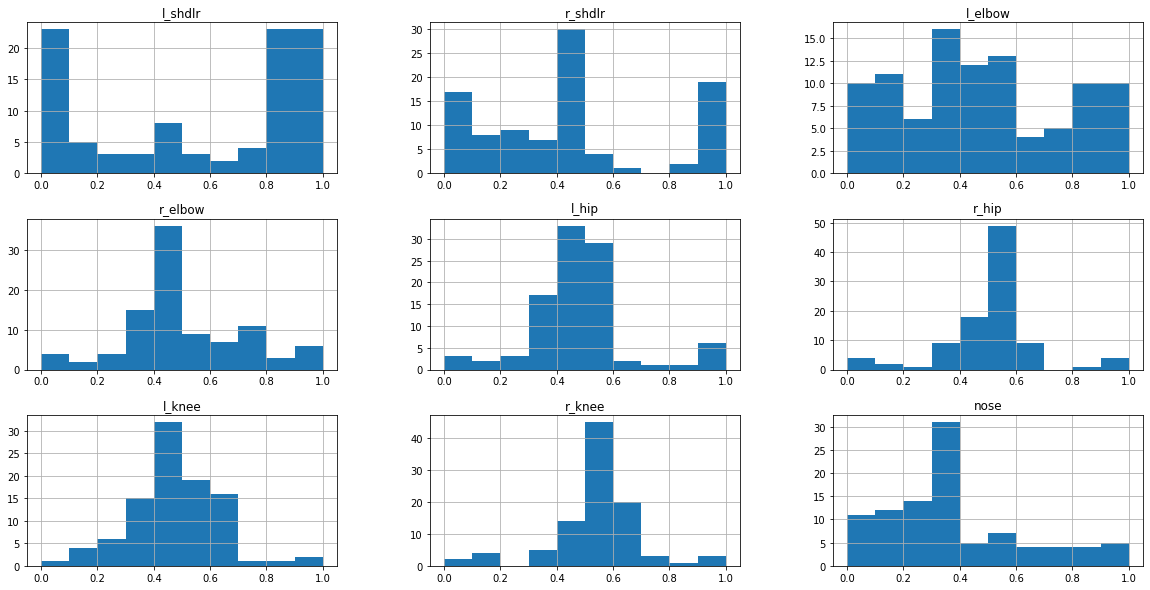

In [180]:
df_scaled.hist(figsize=(20,10))

## KNN

### Without scaling

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


In [182]:
confusion_matrix(y_test, y_pred)

array([[0, 1, 0, 0],
       [0, 2, 0, 2],
       [0, 0, 1, 0],
       [0, 3, 0, 1]])

Scaling

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train.astype('int'))

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred))

Accuracy: 0.45


In [184]:

auc = metrics.roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovo', labels=[1,2,3,4])
auc

0.7638888888888888

In [185]:
confusion_matrix(y_test.astype('int'), y_pred)

array([[1, 2, 1, 0],
       [1, 3, 1, 1],
       [3, 0, 3, 0],
       [0, 2, 0, 2]])

## Ensemble

In [186]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(64,32,16), max_iter=10000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
# tree = tree.DecisionTreeClassifier()

eclf = VotingClassifier(
    estimators=[('rf', clf2), ('gnb', clf3), ('MLP', clf)],
    voting='soft')

for clf, label in zip(
    [clf2, clf3, clf, eclf], 
    ['Random Forest', 'naive Bayes', 'MLP', 'Ensemble']):

    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.15) [Random Forest]
Accuracy: 0.72 (+/- 0.13) [naive Bayes]
Accuracy: 0.57 (+/- 0.10) [MLP]
Accuracy: 0.72 (+/- 0.09) [Ensemble]


In [187]:
clf = eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred))

Accuracy: 0.6


In [188]:
confusion_matrix(y_test.astype('int'), y_pred)

array([[4, 0, 0, 0],
       [1, 4, 1, 0],
       [3, 0, 3, 0],
       [1, 2, 0, 1]])

In [189]:
auc = metrics.roc_auc_score(y_test, eclf.predict_proba(X_test), multi_class='ovo', labels=[1,2,3,4])
auc

0.883101851851852

In [ ]:
from sklearn.metrics import roc_curve, auc

# Parte final visión

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
sections = {'1':np.array([[762, 300],[690,353],[971,353],[975,300]]),
            '2':np.array([[975,300],[971,353],[1247,353],[1185,300]]),
            '3':np.array([[800,271],[762, 300],[975,300],[976,267]]),
            '4':np.array([[970,268],[970,300],[1185,300],[1151,268]]),
            '5':np.array([[443,370],[672,250],[1271,244],[1496,363],[1250,356,],[1151,271],[800,273],[689,362]])}

In [ ]:
def paint(image, c):
    if len(image.split('-')) == 3:
        image = image.split('-')[0] + '-' + image.split('-')[2]

    img = cv2.imread('images/'+image)

    img2 = cv2.imread('images/'+image)

    cv2.fillPoly(img2, pts=[sections[str(c)]], color=(0, 0, 255))

    added = cv2.addWeighted(img2, 0.3, img, 0.7, 0)
    return added, image

In [ ]:
#Predict
df = pd.read_csv("dataset.csv")
prueba = df.head(1)
input = prueba.drop(['image', 'class'], axis=1)
output = eclf.predict(input)

In [ ]:
newImage, name = paint(prueba['image'][0], output[0])
cv2_imshow(newImage)

Output hidden; open in https://colab.research.google.com to view.